In [36]:
import numpy as np
from scipy.stats import entropy
import tensorflow_probability as tfp

import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Laplace(0,1)')

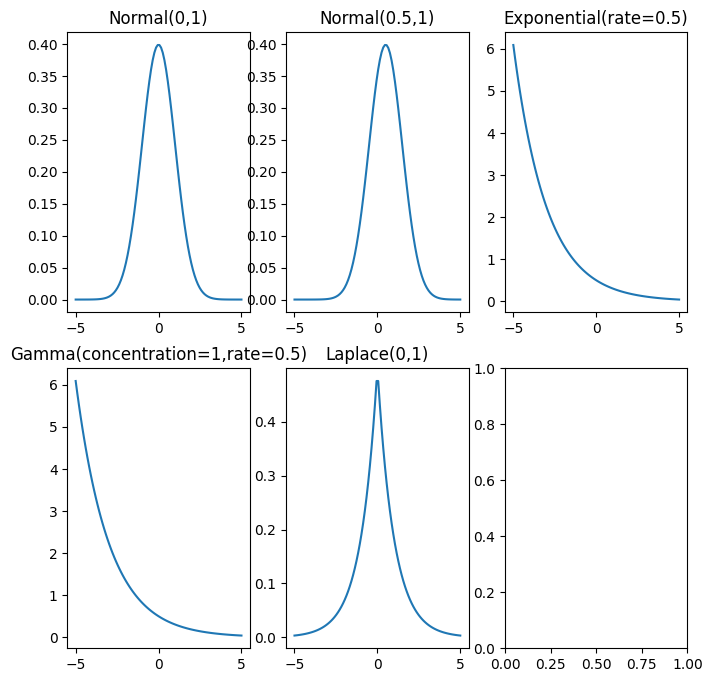

In [53]:
normal = tfp.distributions.Normal(loc=0, scale=1)
normal2 = tfp.distributions.Normal(loc=0.5, scale=1)

expo = tfp.distributions.Exponential(rate=0.5)

gamma = tfp.distributions.Gamma(concentration=1, rate=0.5)

laplace = tfp.distributions.Laplace(loc=0, scale=1)

fig, axs = plt.subplots(2,3, figsize=(8,8))
axs = axs.flat

xx = np.linspace(-5,5,100)
axs[0].plot(xx, [normal.prob(x) for x in xx])
axs[0].set_title('Normal(0,1)')

xx = np.linspace(-5,5,100)
axs[1].plot(xx, [normal2.prob(x) for x in xx])
axs[1].set_title('Normal(0.5,1)')

xx = np.linspace(-5,5,100)
axs[2].plot(xx, [expo.prob(x) for x in xx])
axs[2].set_title('Exponential(rate=0.5)')

xx = np.linspace(-5,5,100)
axs[3].plot(xx, [gamma.prob(x) for x in xx])
axs[3].set_title('Gamma(concentration=1,rate=0.5)')

xx = np.linspace(-5,5,100)
axs[4].plot(xx, [laplace.prob(x) for x in xx])
axs[4].set_title('Laplace(0,1)')
#axs[0].ylim([0,None])

In [64]:
# Compare scipy entropy to tfp's kl divergence

print('Some quick comparrisons between possible KL div implementations in python')
print("Note that numpy's entropy uses samples instead of the distributions.")

xx = np.linspace(-10, 10, 1000)

print('\nN(0,1) vs N(0.5,1)')
print('Scipy entropy:', entropy([normal.prob(x) for x in xx], [normal2.prob(x) for x in xx]))
print('TFP KL Div:', tfp.distributions.kl_divergence(normal, normal2).numpy())

print('\nExpo vs Gamma')
print('Scipy entropy:', entropy([expo.prob(x) for x in xx], [gamma.prob(x) for x in xx]))
print('TFP KL Div:', tfp.distributions.kl_divergence(expo, gamma).numpy())

print('\nN(0,1) vs Laplace(0,1)')
print('Scipy entropy:', entropy([normal.prob(x) for x in xx], [laplace.prob(x) for x in xx]))
print('TFP KL Div:', tfp.distributions.kl_divergence(expo, gamma).numpy())



Some quick comparrisons between possible KL div implementations in python
Note that numpy's entropy uses samples instead of the distributions.

N(0,1) vs N(0.5,1)
Scipy entropy: 0.125
TFP KL Div: 0.125

Expo vs Gamma
Scipy entropy: 0.0
TFP KL Div: 0.0

N(0,1) vs Laplace(0,1)
Scipy entropy: 0.07204491
TFP KL Div: 0.0


In [69]:

print('What happens if we dont have a true distribution to the entropy?')
xx = np.linspace(-10, 10, 1000)

print('\nN(0,1)+1 vs N(0.5,1)')
print('Scipy entropy:', entropy([normal.prob(x)+1 for x in xx], [normal2.prob(x) for x in xx]))

print('Doesnt work')

What happens if we dont have a true distribution to the entropy?

N(0,1)+1 vs N(0.5,1)
Scipy entropy: 13.981461
Doesnt work


In [67]:
print('Lets try the comparrison using samples instead of pdf through linspace')
n_samples = 100


print('\nN(0,1) vs N(0.5,1)')
print('Scipy entropy:', entropy(normal.sample(n_samples), normal2.sample(n_samples)))
print('TFP KL Div:', tfp.distributions.kl_divergence(normal, normal2).numpy())

print('This doesnt work as the samples does not directely represent the distirbution. An alternative would be to use kde = gaussian_kde(samples)')

Lets try the comparrison using samples instead of pdf through linspace

N(0,1) vs N(0.5,1)
Scipy entropy: inf
TFP KL Div: 0.125
This doesnt work as the samples does not directely represent the distirbution. An alternative would be to use kde = gaussian_kde(samples)


Text(0.5, 1.0, 'norm vs laplace')

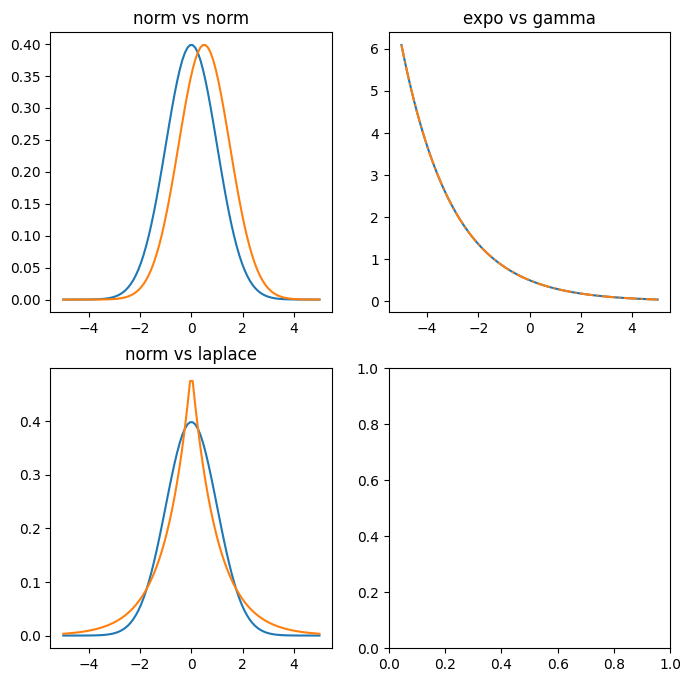

In [63]:

fig, axs = plt.subplots(2,2, figsize=(8,8))
axs = axs.flat

xx = np.linspace(-5,5,100)
axs[0].plot(xx, [normal.prob(x) for x in xx])
axs[0].plot(xx, [normal2.prob(x) for x in xx])
axs[0].set_title('norm vs norm')

axs[1].plot(xx, [expo.prob(x) for x in xx])
axs[1].plot(xx, [gamma.prob(x) for x in xx], linestyle='-.')
axs[1].set_title('expo vs gamma')

axs[2].plot(xx, [normal.prob(x) for x in xx])
axs[2].plot(xx, [laplace.prob(x) for x in xx])
axs[2].set_title('norm vs laplace')
